In [114]:
#colabへのマウント
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1.ライブラリの読み込み


In [115]:
#ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.データの読み込みと確認

In [116]:
# 自分のドライブにマウントしているとドライブ上のファイルを読み込むことができます。
# ファイルの場所がわからない場合、左のタブから目的のファイルを探し、「パスをコピー」しペーストすることで読み込めます。
train = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/test.csv")

In [117]:
#データの確認
print(train.head())
print(test.head())

   id   Age    TypeofContact  CityTier DurationOfPitch      Occupation  \
0   0   50歳     Self Enquiry         2            900秒  Large Business   
1   1   56歳  Company Invited         1             14分        Salaried   
2   2   NaN     Self Enquiry         1             10分  Large Business   
3   3  三十七歳     Self Enquiry         2           1080秒  Small Business   
4   4   48歳  Company Invited         3           1020秒  Small Business   

   Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
0    male                     1.0                4.0          Basic   
1    Male                     1.0                4.0       Standard   
2  Female                     1.0                3.0          Basic   
3  female                     1.0                3.0       Standard   
4  female                     1.0                3.0          Basic   

   PreferredPropertyStar NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0             5         1    

# 3.欠損値の確認

In [118]:
train.isnull().sum()

,0
id,0
Age,100
TypeofContact,6
CityTier,0
DurationOfPitch,121
Occupation,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,33
ProductPitched,0


In [119]:
print(train.shape)
print(test.shape)

(3489, 18)
(3489, 17)


# 4.前処理

In [120]:
#性別データ
import unicodedata

def normalize_gender(gender):
    # 全角を半角に変換し、小文字に変換する
    normalized = unicodedata.normalize('NFKC', gender).lower().strip()
    return normalized

gender_data = train["Gender"]

# 正規化したデータを格納するリスト
normalized_gender_data = []

for gender in gender_data:
    normalized_gender = normalize_gender(gender)
    normalized_gender_data.append(normalized_gender)

print(normalized_gender_data)
# 年齢データのリストを変換後のデータで更新
train["Gender"] = normalized_gender_data

# 更新されたデータフレームを確認
print(train.head())

['male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'male', 'fe male', 'female', 'female', 'male', 'male', 'male', 'female', 'fe male', 'fe male', 'male', 'female', 'female', 'male', 'female', 'female', 'male', 'female', 'fe male', 'female', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'male', 'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male', 'male', 'female', 'female', 'male', 'fe male', 'female', 'male', 'male', 'male', 'male', 'male', 'fe male', 'female', 'male', 'female', 'fe male', 'female', 'male', 'male', 'female', 'male', 'male', 'female', 'female', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female', 'female', 'male', 'male', 'male', 'male', 'femal

In [121]:
#年齢データ
import re

def extract_age(text):
    # 年齢を表すテキストから数値を抽出する正規表現パターン
    pattern = r'\d+'

    # 漢数字と対応するアラビア数字の辞書
    kanji_to_arabic = {
        '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
        '六': 6, '七': 7, '八': 8, '九': 9, '十': 10
    }

    # Check if text is a valid string before applying regex
    if isinstance(text, str):
        # テキストから数値を抽出
        match = re.search(pattern, text)
        if match:
            # 数値がアラビア数字である場合
            return int(match.group())
        else:
            # 数値が漢数字である場合
            numeric_age = 0
            chars = list(text)  # テキストを1文字ずつリストに変換
            i = 0
            while i < len(chars):
                char = chars[i]
                if char in kanji_to_arabic:
                    # 「十」が入る場合
                    if char == '十':
                        if i == 0:
                            # 「十」が最初に来る場合は10を足す
                            numeric_age += 10
                        else:
                            # 「十」が2回目以降に来る場合はそのまま足す
                            numeric_age += kanji_to_arabic[char]
                    else:
                        # 「十」以外の漢数字の場合
                        numeric_age += kanji_to_arabic[char]
                i += 1
            return numeric_age
    else:
        return None  # Handle non-string values by returning None

# 年齢データのリスト
age_data = train["Age"]

# 数値データに変換した年齢を格納するリスト
numeric_age_data = []

# 各要素を数値データに変換
for age_text in age_data:
    numeric_age = extract_age(age_text)
    numeric_age_data.append(numeric_age)

print(numeric_age_data)

[50, 56, None, 20, 48, 19, 47, 49, 33, 31, 51, 46, 49, 51, 53, 20, 25, 18, 20, 44, 30, 34, 29, 56, 30, 41, None, 50, 52, 22, 36, 52, 46, 30, 28, 25, 16, 50, 48, 50, 38, 16, 42, 50, 33, 35, 59, 17, 32, 47, 42, 53, 56, 33, 58, 33, 32, 50, 40, 18, 47, 47, 52, 29, 44, 54, 51, 59, 25, 29, 21, 56, 50, 57, 37, 20, 53, 30, 35, 36, 36, 38, 49, 37, 50, 51, 43, 14, None, 54, None, 26, 40, 31, 27, 40, None, 33, 20, 58, 33, 20, 32, 34, 20, 51, 40, 26, 22, 46, 21, 24, 45, 33, 33, 56, 36, 41, 50, 31, 22, 38, 38, 31, 18, 52, 45, 30, 38, 43, 43, 35, 26, 46, 52, 39, 46, 43, 46, 40, 50, 55, 50, 58, 27, 50, 36, 50, 34, 24, 53, 38, 45, 50, 38, 41, 39, 30, 27, 14, 46, 40, 52, 30, 43, 27, 36, 40, 33, 31, 31, 28, 26, None, 55, 58, 31, 32, 60, 33, 27, 14, 25, 28, 50, 27, 22, 49, 24, 51, 24, 31, None, 32, 60, 46, 39, 48, 19, None, 47, 45, 28, 40, 29, 59, 17, 47, None, 37, 30, 52, 46, 16, 30, 21, None, 58, 33, 31, 49, 50, 20, 26, 22, 50, 59, 39, 40, 20, 57, 39, 38, 36, 24, 31, 23, 33, 32, 52, 30, 32, 42, 45, 40,

In [122]:
# 年齢データのリストを変換後のデータで更新
train["Age"] = numeric_age_data
#平均値で欠損値を埋めた場合
train['Age'].fillna(train['Age'].mean(), inplace=True)


In [123]:
print(train["Age"].head())

0    50.000000
1    56.000000
2    37.976394
3    20.000000
4    48.000000
Name: Age, dtype: float64


In [124]:
# pd.get_dummiesを使って、カテゴリ変数をダミー変数に変換します。
# columns パラメータでダミー変数化する特徴量を指定します。
train = pd.get_dummies(train, columns=["TypeofContact", "Occupation"])
test = pd.get_dummies(test, columns=["TypeofContact", "Occupation"])

In [125]:
#TypeofContact_Company Invited列の内容を確認します。
train["TypeofContact_Company Invited"].head()

,TypeofContact_Company Invited
0,False
1,True
2,False
3,False
4,True


In [126]:
# Occupationのダミー変数の一部を確認します。
train[['Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business']].head()

,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,False,False,True


In [127]:
#DurationOfPitch
# テキストデータから数字の部分だけを抽出して数値データに変換
data_numeric = []
for item in train["DurationOfPitch"]:
    if pd.notna(item):
        if '秒' in item:
            seconds = int(item.replace('秒', ''))
            minutes = seconds / 60
            data_numeric.append(minutes)
        elif '分' in item:
            minutes = int(item.replace('分', ''))
            data_numeric.append(minutes)
    else:
        data_numeric.append(pd.NA)

# 数値データに変換した列を元のデータフレームに追加
train["DurationOfPitch"] = data_numeric


In [128]:
#平均値で欠損値を埋めた場合
train['DurationOfPitch'].fillna(train['DurationOfPitch'].mean(), inplace=True)

In [129]:
#NumberOfFollowupsの前処理
#平均値で欠損値を埋めた場合
train['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean(), inplace=True)

In [130]:
#ProductPitchedの前処理、文字が正しい形に変更する
# ユニークな値を取得
unique_values = train['ProductPitched'].unique()

# ユニークな値を表示
print("Unique values in 'ProductPitched':")
for value in unique_values:
    print(value)

Unique values in 'ProductPitched':
Basic
Standard
Super Deluxe
basic
SUPER DELUXE
super deluxe
BASIC
Deluxe
deluxe
STANᗞARD
STANDARD
Вasic
DELUXE
ꓢuper De|uxe
Ѕuper Deluxe
BAՏIC
Basıc
King
Super De|uxe
king
standard
KING
BΑSIC
B𝖺sic
De|uxe
ᎠELUXE
Basiϲ
de|u×e
Delu×e
Standar𝔡
Basi𝘤
Βasic
Տuper Deluxe
Staոdard
BAꓢIC
ᗞeluxe
Տtandard
Βası𝘤
Kıng
Baｓic
basıc
super de|uxe
Stand𝖺rd
S𝘵andard
𐊡asic
St𝖺ndard
Super ᗞeluxe
de|uxe
ｓuper deluxe
STANDARᎠ
Basiс
DΕLUXΕ
ꓢuper Deluxe
BASΙC
ꓢtandard
В𝖺sic
Standa𝘳d
basiϲ
staոdard
Super Ꭰeluxe
DELUXΕ
Ѕtandard
𐊡asi𝘤
Ꭰeluxe
Kıոg
𝙳eluxe
Kiոg
Βasıc
BASIС
SUPER DΕLUXE
B𝖺si𝘤
ΒASIС
Super 𝙳eluxe
Տtanda𝘳d
Basıϲ
ЅTANDARD


In [131]:
category_map = {
    'basic': 'basic', 'Basic': 'basic', 'BASIC': 'basic', 'Basiϲ': 'basic', 'Βasic': 'basic',
    'standard': 'standard', 'Standard': 'standard', 'STANDARD': 'standard',
    'STANᗞARD': 'standard', 'Standar𝔡': 'standard', 'Staոdard': 'standard',
    'BAꓢIC': 'standard', 'ᗞeluxe': 'deluxe', 'Տtandard': 'standard', 'Βası𝘜': 'standard',
    'king': 'king', 'King': 'king', 'KING': 'king', 'Kıng': 'king', 'Kiոg': 'king',
    'super deluxe': 'superdeluxe', 'Super Deluxe': 'superdeluxe', 'super de|uxe': 'superdeluxe',
    'ꓢuper De|uxe': 'superdeluxe', 'Ѕuper Deluxe': 'superdeluxe', 'Super ᗞeluxe': 'superdeluxe',
    'SUPER DELUXE': 'superdeluxe', 'SUPER DΕLUXE': 'superdeluxe', 'Super 𝙳eluxe': 'superdeluxe',
    'deluxe': 'deluxe', 'Deluxe': 'deluxe', 'DELUXE': 'deluxe', 'De|uxe': 'deluxe',
    'Delu×e': 'deluxe', 'de|u×e': 'deluxe', 'De|uxe': 'deluxe', 'Deluxe': 'deluxe',
    'BΑSIC': 'basic', 'B𝖺sic': 'basic', 'Βasic': 'basic', 'Basiϲ': 'basic',
    'Basiϲ': 'basic', 'BASİС': 'basic', 'ΒASIС': 'basic', 'B𝖺si𝘄': 'basic',
    'Basiϲ': 'basic', 'BASIС': 'basic', 'Basiϲ': 'basic'
}

# 変換関数
def map_product_pitched(value):
    for key in category_map:
        if key.lower() == value.lower():
            return category_map[key]
    return 'unknown'

# データの変換
train['ProductPitched'] = train['ProductPitched'].apply(map_product_pitched)

# カテゴリのカウント
category_counts = train['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1118
deluxe         1039
standard        825
superdeluxe     314
king            125
unknown          68
Name: count, dtype: int64


In [132]:
# 欠損値補完のために、各カテゴリの割合に基づいて'unknown'を分配
def fill_unknowns(df):
    # 各カテゴリの割合を計算
    category_counts = df['ProductPitched'].value_counts()
    total_unknown = df[df['ProductPitched'] == 'unknown'].shape[0]

    # unknownカテゴリを各カテゴリの割合に基づいて補完
    proportions = category_counts / category_counts.sum()
    fill_counts = (proportions * total_unknown).astype(int)

    for category, count in fill_counts.items():
        if count > 0:
            # 'unknown'を各カテゴリに分配
            indices_to_fill = df[df['ProductPitched'] == 'unknown'].index[:count]
            df.loc[indices_to_fill, 'ProductPitched'] = category

    return df

# 'unknown'の補完
train_filled = fill_unknowns(train)

category_counts = train['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1139
deluxe         1059
standard        841
superdeluxe     320
king            127
unknown           3
Name: count, dtype: int64


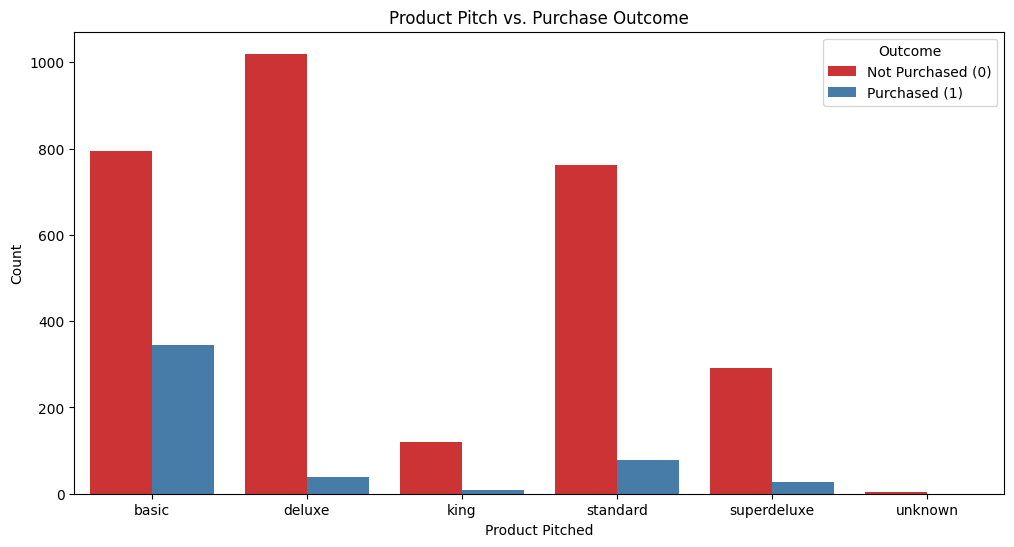

In [133]:
# 各カテゴリごとの成約と不成約のカウントを集約
summary = train.groupby(['ProductPitched', 'ProdTaken']).size().unstack(fill_value=0)
summary.columns = ['Not Purchased (0)', 'Purchased (1)']
summary = summary.reset_index()

# 棒グラフの設定
plt.figure(figsize=(12, 6))
summary_melted = summary.melt(id_vars='ProductPitched', var_name='Outcome', value_name='Count')

# 棒グラフの作成
sns.barplot(x='ProductPitched', y='Count', hue='Outcome', data=summary_melted, palette='Set1')

plt.title('Product Pitch vs. Purchase Outcome')
plt.xlabel('Product Pitched')
plt.ylabel('Count')
plt.legend(title='Outcome')
plt.show()

In [134]:
print(train["PitchSatisfactionScore"].isnull().sum())
print(train["PitchSatisfactionScore"].dtype)

0
int64


In [135]:
train["customer_info"].isnull().sum()

0

In [136]:
train["customer_info"].head()

,customer_info
0,未婚 車未所持 子供なし
1,"離婚済み,車あり,子供無し"
2,"結婚済み、自動車未所有,子供なし"
3,離婚済み、車所持、子供無し
4,独身／車所持／無子


In [137]:
train["MonthlyIncome"].isnull().sum()

56

In [138]:
train["MonthlyIncome"].head()

,MonthlyIncome
0,253905.0
1,404475.0
2,278145.0
3,326805.0
4,258435.0


In [139]:
# データタイプの確認
print(train["MonthlyIncome"].dtype)
# 文字列型から数値型に変換（数値に変換できない値はNaNに置き換え）
train["MonthlyIncome"] = pd.to_numeric(train["MonthlyIncome"], errors='coerce')

print(train["MonthlyIncome"].max())
print(train["MonthlyIncome"].min())
print(train["MonthlyIncome"].mean())
print(train["MonthlyIncome"].median())
print(train["MonthlyIncome"].std())

object
578670.0
238890.0
355531.77161152614
343935.0
75888.3246481967


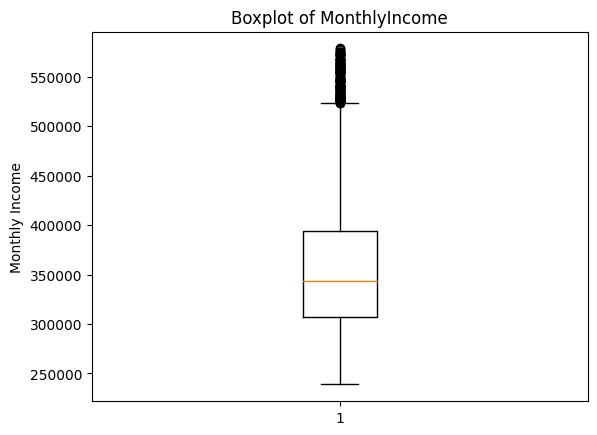

In [140]:
import matplotlib.pyplot as plt

# 箱ひげ図の作成
plt.boxplot(train["MonthlyIncome"].dropna())  # 欠損値があれば無視
plt.title("Boxplot of MonthlyIncome")
plt.ylabel("Monthly Income")
plt.show()


In [141]:
#平均値で欠損値を埋めた場合
train['MonthlyIncome'].fillna(train['MonthlyIncome'].median(), inplace=True)

In [142]:
#NumberOfTripsについて確認
print(train["NumberOfTrips"].isnull().sum())
print(train["NumberOfTrips"].dtype)
print(train["NumberOfTrips"].unique())


22
object
['5' '2' '4' '1' '年に1回' '年に2回' '年に6回' '3' '年に5回' '7' '6' '半年に1回' '年に4回'
 '年に3回' '8' '年に8回' nan '年に7回' '四半期に1回']


In [143]:
import re

def convert_to_number(s):
    if pd.isna(s):
        return s  # 欠損値はそのまま残す
    # 数字だけの値はそのまま返す
    if s.isdigit():
        return int(s)

    # 文字列の値を正規表現で数値に変換
    patterns = {
        '年に(\d+)回': lambda m: int(m.group(1)),
        '半年に1回': lambda m: 2,
        '四半期に1回': lambda m: 4
    }

    for pattern, func in patterns.items():
        match = re.match(pattern, s)
        if match:
            return func(match)

    # パターンに一致しない場合はNaNを返す
    return None

# NumberOfTrips列の値を変換
train['NumberOfTrips'] = train['NumberOfTrips'].apply(convert_to_number)


In [144]:
train['NumberOfTrips'].unique()

array([ 5.,  2.,  4.,  1.,  6.,  3.,  7.,  8., nan])

In [145]:
#最頻値で欠損値を埋めた場合
train['NumberOfTrips'].fillna(train['NumberOfTrips'].mode()[0], inplace=True)


In [146]:
train["NumberOfTrips"].isnull().sum()

0

In [147]:
train.head(10)

,id,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,...,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,0,50.000000,2,15.0,male,1.0,4.0,basic,3.0,5.0,...,4,Executive,253905.0,未婚 車未所持 子供なし,1,False,True,True,False,False
1,1,56.000000,1,14.0,male,1.0,4.0,standard,3.0,2.0,...,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0,True,False,False,True,False
2,2,37.976394,1,10.0,female,1.0,3.0,basic,3.0,4.0,...,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1,False,True,True,False,False
3,3,20.000000,2,18.0,female,1.0,3.0,standard,4.0,1.0,...,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0,False,True,False,False,True
4,4,48.000000,3,17.0,female,1.0,3.0,basic,4.0,4.0,...,4,Executive,258435.0,独身／車所持／無子,1,True,False,False,False,True
5,5,19.000000,2,16.0,male,1.0,3.0,basic,3.0,2.0,...,4,Executive,343935.0,独身、車未所持、子供ゼロ,0,False,True,False,False,True
6,6,47.000000,3,14.0,male,1.0,3.0,superdeluxe,4.0,1.0,...,4,AVP,453180.0,独身 自家用車あり 子供なし,0,True,False,False,False,True
7,7,49.000000,2,22.0,male,1.0,3.0,basic,3.0,2.0,...,4,Executive,261900.0,結婚済み、車未所持、子供なし,0,False,True,False,False,True
8,8,33.000000,2,20.0,female,1.0,3.0,basic,3.0,4.0,...,4,Executive,247800.0,独身/車未所持/子供無し,1,True,False,True,False,False
9,9,31.000000,1,11.0,male,1.0,3.0,basic,3.0,2.0,...,3,Senior Manager,257610.0,結婚済み、車所持、非育児家庭,0,True,False,True,False,False


In [148]:
train["Designation"]

,Designation
0,Executive
1,Senior Manager
2,Executive
3,Senior Manager
4,Executive
...,...
3484,Executive
3485,Executive
3486,Senior Manager
3487,VP


In [149]:
# 全角文字を半角文字に変換する関数
def fullwidth_to_halfwidth(s):
    return ''.join([chr(ord(c) - 0xFEE0) if '！' <= c <= '～' else c for c in s])

# Designation列の全角文字を半角文字に変換
train['Designation'] = train['Designation'].apply(fullwidth_to_halfwidth) # Use 'train' instead of 'np.tracemalloc_domain'

# 変換後のユニークな値を再度確認
unique_designations_after_conversion = train['Designation'].unique() # Also fix typo here: 'traiin' -> 'train'
unique_designations_after_conversion

array(['Executive', 'Senior Manager', 'AVP', 'Manager', 'Senior Manage𝙧',
       'Μanager', 'VP', 'Sеnior Manager', 'ΑVP', 'АVP', 'E×ecutive',
       'Mαnage𝙧', 'Executiѵе', 'Ѕenior Manager', 'Managеr', 'Еxecutivе',
       'Senior Μanαger', 'Еxecutive', 'Exеcutivе', 'Exеcutive',
       'Senior Managе𝙧', 'Manage𝙧', 'Senio𝙧 Manager', 'Manαger',
       'Μanage𝙧', 'Manαgеr', 'Senior Managеr', 'Executivе', 'Executiѵe',
       'Е×еcutive', 'Տenior Μanager', 'Exеcutiѵе', 'Senior Manαger',
       'Mαnager', 'Senior Mαnαger', 'E×еcutiѵe', 'Ѕenior Manαger',
       'Mαnαger', 'Μanagеr', 'Sеnior Managеr', 'Տenior Manager',
       'Mαnagеr', 'Еxеcutivе', 'Senior Mαnager', 'Е×ecutive'],
      dtype=object)

In [150]:
pip install fuzzywuzzy[speedup]


In [151]:
from fuzzywuzzy import process

# 正しい値のリスト
valid_designations = ['executive', 'manager', 'senior manager', 'avp', 'vp']

def fuzzy_correct(s):
    match = process.extractOne(s, valid_designations)
    if match[1] > 70:  # 類似度が80%以上の場合のみ修正
        return match[0]
    else:
        return s

train['Designation'] = train['Designation'].apply(fuzzy_correct)
train['Designation'].unique()

array(['executive', 'senior manager', 'avp', 'manager', 'vp', 'Е×еcutive',
       'Exеcutiѵе', 'E×еcutiѵe', 'Еxеcutivе'], dtype=object)

In [152]:
train

,id,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,...,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,0,50.000000,2,15.0,male,1.0,4.0,basic,3.0,5.0,...,4,executive,253905.0,未婚 車未所持 子供なし,1,False,True,True,False,False
1,1,56.000000,1,14.0,male,1.0,4.0,standard,3.0,2.0,...,4,senior manager,404475.0,"離婚済み,車あり,子供無し",0,True,False,False,True,False
2,2,37.976394,1,10.0,female,1.0,3.0,basic,3.0,4.0,...,4,executive,278145.0,"結婚済み、自動車未所有,子供なし",1,False,True,True,False,False
3,3,20.000000,2,18.0,female,1.0,3.0,standard,4.0,1.0,...,5,senior manager,326805.0,離婚済み、車所持、子供無し,0,False,True,False,False,True
4,4,48.000000,3,17.0,female,1.0,3.0,basic,4.0,4.0,...,4,executive,258435.0,独身／車所持／無子,1,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,3484,40.000000,2,26.0,male,2.0,3.0,basic,3.0,3.0,...,1,executive,258900.0,離婚済み 乗用車所持 子供なし,1,False,True,False,True,False
3485,3485,40.000000,1,9.0,male,3.0,3.0,basic,5.0,5.0,...,3,executive,260415.0,結婚済み、車所持、子供2人,0,False,True,True,False,False
3486,3486,31.000000,1,14.0,female,3.0,2.0,standard,3.0,5.0,...,4,senior manager,317340.0,独身／車所持／こども1人,0,False,True,False,False,True
3487,3487,56.000000,2,15.0,male,3.0,6.0,king,3.0,7.0,...,4,vp,527910.0,結婚済み、自動車未所有、子供2人,1,True,False,False,True,False


# 5. データの分割

In [153]:
# "ProdTaken"は予測対象とするため、別途target変数に格納する
target = train["ProdTaken"]
# "ProdTaken"列を削除
train = train.drop(columns=["id","customer_info","ProdTaken"], axis=1)
test = test.drop(columns=["id","customer_info"], axis=1)

In [154]:
train.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,50.000000,2,15.0,male,1.0,4.0,basic,3.0,5.0,1,4,executive,253905.0,False,True,True,False,False
1,56.000000,1,14.0,male,1.0,4.0,standard,3.0,2.0,1,4,senior manager,404475.0,True,False,False,True,False
2,37.976394,1,10.0,female,1.0,3.0,basic,3.0,4.0,0,4,executive,278145.0,False,True,True,False,False
3,20.000000,2,18.0,female,1.0,3.0,standard,4.0,1.0,0,5,senior manager,326805.0,False,True,False,False,True
4,48.000000,3,17.0,female,1.0,3.0,basic,4.0,4.0,0,4,executive,258435.0,True,False,False,False,True


In [155]:
test.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,４８歳,2,13分,Male,1.0,4.0,Super De|uxe,3.0,7,0,3,AVP,496950.0,False,True,False,False,True
1,30代,2,12分,Ｆｅｍａｌｅ,1.0,4.0,Standard,3.0,4,1,3,Senior Manager,月収30.0万円,False,True,False,False,True
2,25歳,1,540秒,Female,1.0,4.0,Basic,3.0,1,0,3,Executive,月収26.0万円,False,True,False,True,False
3,21歳,2,420秒,Male,1.0,4.0,Basic,4.0,1,0,3,Senior Manager,259875.0,True,False,False,True,False
4,41歳,1,7分,MALE,1.0,4.0,Basic,3.0,1,0,4,Executive,268830.0,True,False,False,True,False


In [156]:
# scikit-learnからtrain_test_splitをインポートします。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:38:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


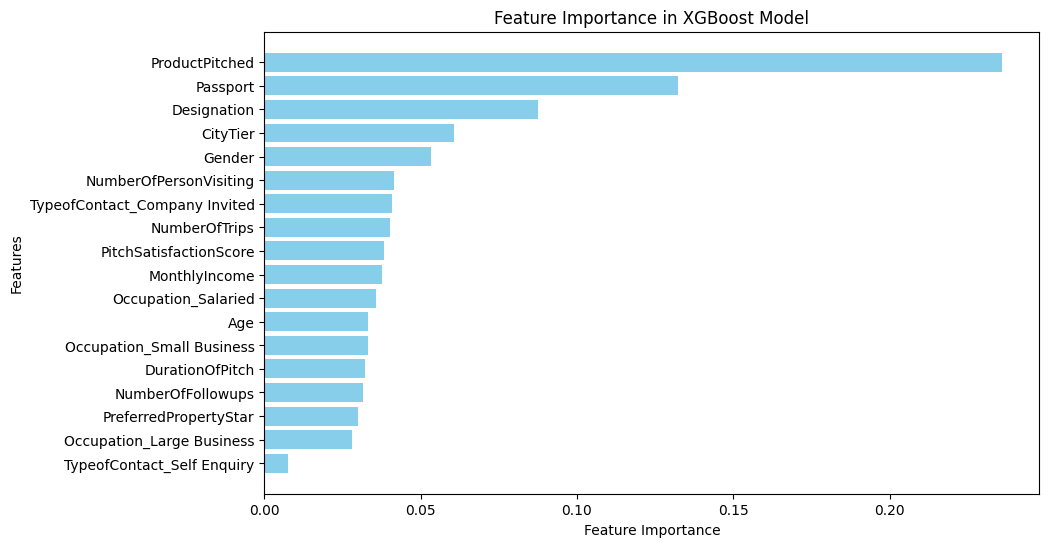

In [157]:
# 残りの特徴量とターゲットを分ける
X = train
y = target # ターゲット列は先に削除したが、元のデータから取得

# カテゴリカルデータのエンコード
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# XGBoostモデルの訓練
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)

# 特徴量重要度の取得
importance = model.feature_importances_

# 特徴量重要度をデータフレームに変換
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
})

# 重要度順にソート
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 特徴量重要度の可視化
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in XGBoost Model')
plt.gca().invert_yaxis()  # 重要度の高い順に並べるために軸を反転
plt.show()

In [158]:
# Genderデータのリスト
gender_data_test = test["Gender"]

# 正規化したデータを格納するリスト
normalized_gender_data_test = []

# 各要素を正規化
for gender in gender_data_test:
    normalized_gender = normalize_gender(gender)
    normalized_gender_data_test.append(normalized_gender)

# テストデータの「Gender」列を更新
test["Gender"] = normalized_gender_data_test

# 更新されたテストデータフレームを確認
print(test.head())

   Age  CityTier DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  ４８歳         2             13分    male                     1.0   
1  30代         2             12分  female                     1.0   
2  25歳         1            540秒  female                     1.0   
3  21歳         2            420秒    male                     1.0   
4  41歳         1              7分    male                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  \
0                4.0   Super De|uxe                    3.0             7   
1                4.0       Standard                    3.0             4   
2                4.0          Basic                    3.0             1   
3                4.0          Basic                    4.0             1   
4                4.0          Basic                    3.0             1   

   Passport  PitchSatisfactionScore     Designation MonthlyIncome  \
0         0                       3             AVP      496950.0

In [159]:
# 数値データに変換した年齢を格納するリスト
numeric_test_age_data = []

# 各要素を数値データに変換
for age_text in test["Age"]:
    numeric_age = extract_age(age_text)
    numeric_test_age_data.append(numeric_age)

# テストデータに変換後の年齢データに更新
test["Age"] = numeric_test_age_data

# 結果を確認
print(test.head())



    Age  CityTier DurationOfPitch  Gender  NumberOfPersonVisiting  \
0  48.0         2             13分    male                     1.0   
1  30.0         2             12分  female                     1.0   
2  25.0         1            540秒  female                     1.0   
3  21.0         2            420秒    male                     1.0   
4  41.0         1              7分    male                     1.0   

   NumberOfFollowups ProductPitched  PreferredPropertyStar NumberOfTrips  \
0                4.0   Super De|uxe                    3.0             7   
1                4.0       Standard                    3.0             4   
2                4.0          Basic                    3.0             1   
3                4.0          Basic                    4.0             1   
4                4.0          Basic                    3.0             1   

   Passport  PitchSatisfactionScore     Designation MonthlyIncome  \
0         0                       3             AVP      49

In [160]:
#平均値で欠損値を埋めた場合
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [161]:
#テキストデータから数字の部分だけを抽出して数値データに変換
data_numeric = []
for item in test["DurationOfPitch"]:
    if pd.notna(item):
        if '秒' in item:
            seconds = int(item.replace('秒', ''))
            minutes = seconds / 60
            data_numeric.append(minutes)
        elif '分' in item:
            minutes = int(item.replace('分', ''))
            data_numeric.append(minutes)
    else:
        data_numeric.append(pd.NA)

# 数値データに変換した列を元のデータフレームに追加
test["DurationOfPitch"] = data_numeric

In [162]:
null_count = test["DurationOfPitch"].isnull().sum()
test['DurationOfPitch'].fillna(train['DurationOfPitch'].mean(), inplace=True)
print("NULL の個数:", null_count)

NULL の個数: 131


In [163]:
null_count = test["NumberOfFollowups"].isnull().sum()
test['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean(), inplace=True)
print("NULL の個数:", null_count)

NULL の個数: 24


In [164]:
# ユニークな値を取得
unique_values = test['ProductPitched'].unique()
# ユニークな値を表示
print("Unique values in 'ProductPitched':")
for value in unique_values:
    print(value)

Unique values in 'ProductPitched':
Super De|uxe
Standard
Basic
Deluxe
Super Deluxe
DELUXE
King
standard
basic
BASIC
basıc
STANDARD
SUPER DELUXE
Ѕtandard
super deluxe
𐊡asic
SUPER ᎠELUXE
SUPER ᗞELUXE
Βasic
king
Basiс
ꓢtandard
Super 𝙳eluxe
ᗞeluxe
Basi𝘤
Staոdard
deluxe
DELUXΕ
De|uxe
Basıc
Delu×e
basiϲ
Baｓic
Вasic
Stand𝖺rd
KING
B𝖺si𝘤
basiс
𝙳eluxe
Ꭰeluxe
BASIС
Super ᗞeluxe
STANDARᎠ
Stan𝔡ard
STΑNDARD
ᗞELUXE
Baｓıc
de|uxe
Super Ꭰeluxe
Super Delu×e
Basıϲ
ꓢuper Deluxe
SUPΕR ᎠELUXE
Ꭰe|uxe
B𝖺sic
Basiϲ
stan𝔡ard
BASΙC
basi𝘤
stand𝖺rd
St𝖺ndard
Kıng
baｓic
Bası𝘤
BASΙС
S𝘵𝖺nda𝘳d
kiոg
Standa𝘳d
standar𝔡
Stand𝖺𝘳d
BAЅIC


In [165]:
# データの変換
test['ProductPitched'] = test['ProductPitched'].apply(map_product_pitched)

# カテゴリのカウント
category_counts = test['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1155
deluxe         1038
standard        745
superdeluxe     313
king            160
unknown          78
Name: count, dtype: int64


In [166]:
# 'unknown'の補完
test_filled = fill_unknowns(test)

category_counts = test['ProductPitched'].value_counts()
print(category_counts)

ProductPitched
basic          1180
deluxe         1061
standard        761
superdeluxe     319
king            163
unknown           5
Name: count, dtype: int64


In [167]:
# 文字列型から数値型に変換（数値に変換できない値はNaNに置き換え）
test["MonthlyIncome"] = pd.to_numeric(test["MonthlyIncome"], errors='coerce')
#平均値で欠損値を埋めた場合
test['MonthlyIncome'].fillna(test['MonthlyIncome'].median(), inplace=True)

In [168]:
# 全角文字を半角文字に変換する関数
def fullwidth_to_halfwidth(s):
    return ''.join([chr(ord(c) - 0xFEE0) if '！' <= c <= '～' else c for c in s])

# Designation列の全角文字を半角文字に変換
test['Designation'] = test['Designation'].apply(fullwidth_to_halfwidth)

# 変換後のユニークな値を再度確認
unique_designations_after_conversion = test['Designation'].unique()
unique_designations_after_conversion

array(['AVP', 'Senior Manager', 'Executive', 'Manager', 'VP', 'Executivе',
       'Senior Managеr', 'Exеcutivе', 'Exеcutive', 'Senio𝙧 Manage𝙧',
       'Sеnior Manager', 'Executiѵe', 'Senio𝙧 Manager', 'АVP', 'Mαnager',
       'Managеr', 'ΑVP', 'Μαnager', 'Manage𝙧', 'E×ecutive', 'Mαnαger',
       'Μanager', 'Տenior Manager', 'Еxecutive', 'Senior Manage𝙧',
       'Senior Manαger', 'Senio𝙧 Manαger', 'Manαger', 'Ѕenior Μanage𝙧',
       'Μαnagеr', 'Manαgеr', 'Managе𝙧', 'Տenior Μanager',
       'Senio𝙧 Managеr', 'Senior Μanager', 'Sеnior Managе𝙧',
       'Senio𝙧 Mαnage𝙧', 'Ѕenior Manager', 'Mαnagеr', 'Senior Managе𝙧',
       'Senior Mαnαger', 'Sеnior Managеr', 'Mαnαgеr', 'Sеnio𝙧 Manager',
       'Senior Mαnager'], dtype=object)

In [169]:
from fuzzywuzzy import process

# 正しい値のリスト
valid_designations = ['executive', 'manager', 'senior manager', 'avp', 'vp']

def fuzzy_correct(s):
    match = process.extractOne(s, valid_designations)
    if match[1] > 50:  # 類似度が80%以上の場合のみ修正
        return match[0]
    else:
        return s

test['Designation'] = test['Designation'].apply(fuzzy_correct)
test['Designation'].unique()

array(['avp', 'senior manager', 'executive', 'manager', 'vp'],
      dtype=object)

In [170]:
import re

def convert_to_number(s):
    if pd.isna(s):
        return s  # 欠損値はそのまま残す
    # 数字だけの値はそのまま返す
    if s.isdigit():
        return int(s)

    # 文字列の値を正規表現で数値に変換
    patterns = {
        '年に(\d+)回': lambda m: int(m.group(1)),
        '半年に1回': lambda m: 2,
        '四半期に1回': lambda m: 4
    }

    for pattern, func in patterns.items():
        match = re.match(pattern, s)
        if match:
            return func(match)

    # パターンに一致しない場合はNaNを返す
    return None

# NumberOfTrips列の値を変換
test['NumberOfTrips'] = test['NumberOfTrips'].apply(convert_to_number)


In [171]:
test["NumberOfTrips"].isnull().sum()
#最頻値で欠損値を埋めた場合
test['NumberOfTrips'].fillna(test['NumberOfTrips'].mode()[0], inplace=True)
test["NumberOfTrips"].isnull().sum()
test["NumberOfTrips"].unique()

array([7., 4., 1., 6., 5., 3., 2., 8.])

In [172]:
test.isnull().sum()


,0
Age,0
CityTier,0
DurationOfPitch,0
Gender,0
NumberOfPersonVisiting,0
NumberOfFollowups,0
ProductPitched,0
PreferredPropertyStar,0
NumberOfTrips,0
Passport,0


In [173]:
test.head()

,Age,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,TypeofContact_Company Invited,TypeofContact_Self Enquiry,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business
0,48.0,2,13.0,male,1.0,4.0,superdeluxe,3.0,7.0,0,3,avp,496950.0,False,True,False,False,True
1,30.0,2,12.0,female,1.0,4.0,standard,3.0,4.0,1,3,senior manager,342667.5,False,True,False,False,True
2,25.0,1,9.0,female,1.0,4.0,basic,3.0,1.0,0,3,executive,342667.5,False,True,False,True,False
3,21.0,2,7.0,male,1.0,4.0,basic,4.0,1.0,0,3,senior manager,259875.0,True,False,False,True,False
4,41.0,1,7.0,male,1.0,4.0,basic,3.0,1.0,0,4,executive,268830.0,True,False,False,True,False


# 6.モデルの学習

In [174]:
# ランダムフォレストとAUC評価指標をインポートします。
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [175]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, random_state = 42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(2616, 18) (873, 18) (2616,) (873,)


In [176]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer # Import SimpleImputer to handle missing values

# LabelEncoderを使用して、カテゴリカルデータを数値に変換
label_encoder = LabelEncoder()
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_valid['Gender'] = label_encoder.fit_transform(X_valid['Gender'])
test['Gender'] = label_encoder.fit_transform(test['Gender'])

X_train['ProductPitched'] = label_encoder.fit_transform(X_train['ProductPitched'])
X_valid['ProductPitched'] = label_encoder.fit_transform(X_valid['ProductPitched'])
test['ProductPitched'] = label_encoder.fit_transform(test['ProductPitched'])

X_train['Designation'] = label_encoder.fit_transform(X_train['Designation'])
X_valid['Designation'] = label_encoder.fit_transform(X_valid['Designation'])
test['Designation'] = label_encoder.fit_transform(test['Designation'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent') # Replace missing values with the most frequent value
X_train = imputer.fit_transform(X_train)
X_valid = imputer.transform(X_valid)

# ランダムフォレストモデルの呼び出し
model = RandomForestClassifier(random_state=42)

#ランダムフォレストの定義 - Remove 'auto' from 'max_features' options
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'], # Valid options for 'max_features'
    'bootstrap': [True, False]
}

#グリッドサーチの定義
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc')

#グリッドサーチの実行
grid_search.fit(X_train, y_train)

# 最適なパラメータを表示
print("Best Parameters:", grid_search.best_params_)

# 最適なモデルを取得
best_model = grid_search.best_estimator_

# 最適なモデルを使用して予測
y_pred = best_model.predict(X_valid)

# 学習
model.fit(X_train, y_train)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


RandomForestClassifier(random_state=42)

Training Accuracy: 0.9052
Validation Accuracy: 0.8843
Training AUC: 0.9537
Validation AUC: 0.8201


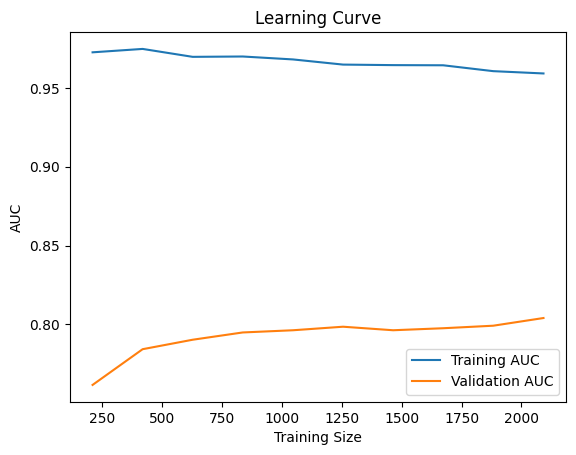

In [198]:
from sklearn.metrics import accuracy_score, roc_auc_score

# トレーニングデータに対する予測
y_train_pred = best_model.predict(X_train)
y_train_pred_prob = best_model.predict_proba(X_train)[:, 1]

# バリデーションデータに対する予測
y_valid_pred = best_model.predict(X_valid)
y_valid_pred_prob = best_model.predict_proba(X_valid)[:, 1]

# 精度の計算
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

# AUCスコアの計算
train_auc = roc_auc_score(y_train, y_train_pred_prob)
valid_auc = roc_auc_score(y_valid, y_valid_pred_prob)

# 結果の表示
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print(f"Training AUC: {train_auc:.4f}")
print(f"Validation AUC: {valid_auc:.4f}")

# 学習曲線の描画（オプション）
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training AUC')
plt.plot(train_sizes, valid_mean, label='Validation AUC')

plt.xlabel('Training Size')
plt.ylabel('AUC')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [183]:
# predict_proba() で予測します。予測したいデータを入力します。
pred = best_model.predict_proba(X_valid)

In [184]:
# 予測の中身を確認します
print(pred[:5])

[[0.89845766 0.10154234]
 [0.92976745 0.07023255]
 [0.8978535  0.1021465 ]
 [0.66001566 0.33998434]
 [0.86321134 0.13678866]]


In [185]:
# AUCの評価はroc_auc_score(正解データ, 予測データ)で可能です。
# 成約したかどうかを判定するため、2列目の1の確率(成約している確率)を予測データとして入力します。
score = roc_auc_score(y_valid, pred[:, 1])
print(score)

0.8200695925468626


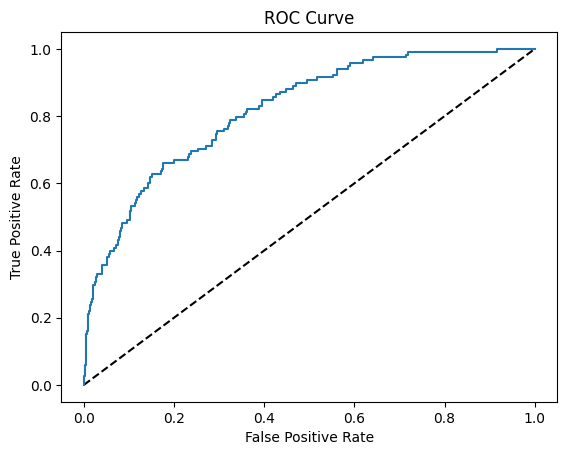

In [186]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_valid, pred[:, 1])

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# 7.提出

In [196]:
test["NumberOfPersonVisiting"].unique()

array([1., 2., 3., 4.])

In [197]:
test.shape

(3489, 18)

In [189]:
# テストデータを用いて予測します。
predict = best_model.predict_proba(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [190]:
# submit_sample.csvを読み込みます。
submit = pd.read_csv("/content/drive/MyDrive/SIGNATE_Cup 2024/data/sample_submit.csv", header=None)
submit.head()

,0,1
0,3489,0.119451
1,3490,0.343575
2,3491,0.119451
3,3492,0.119451
4,3493,0.119451


In [191]:
# 提出ファイルの2列目を予測値で置き換えます。
submit[1] = predict[:, 1]

In [192]:
#確認してみましょう
submit.head()

,0,1
0,3489,0.103490
1,3490,0.317216
2,3491,0.203656
3,3492,0.572600
4,3493,0.301825


In [193]:
#submission.csvでデータを保存(提出様式はindex=False, header=Noneとしてください。)
submit.to_csv("submission.csv", index=False, header=None)